Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7307 non-null   object 
 1   Temperature   7307 non-null   float64
 2   Humidity      7307 non-null   float64
 3   MQ7_analog    7307 non-null   float64
 4   MQ9_analog    7307 non-null   float64
 5   MG811_analog  7307 non-null   float64
 6   MQ135_analog  7307 non-null   float64
 7   device_name   7307 non-null   object 
 8   CO2           7307 non-null   float64
dtypes: float64(7), object(2)
memory usage: 513.9+ KB
None

Train Data Overview:
          ID  Temperature  Humidity  MQ7_analog  MQ9_analog  MG811_analog  \
0  ID_000001       28.975    74.475      2480.0      3476.5        1572.0   
1  ID_000002       31.900    66.500      3813.0      2726.0        4145.0   
2  ID_000003       31.675    60.015      2811.0      1563.5        4250.0   
3  ID_000004   

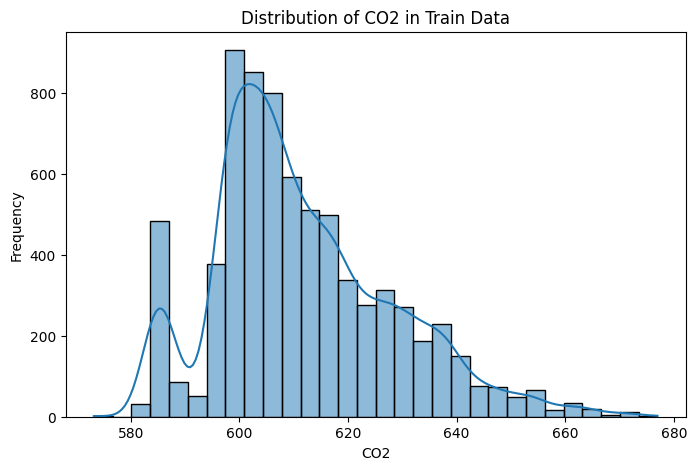

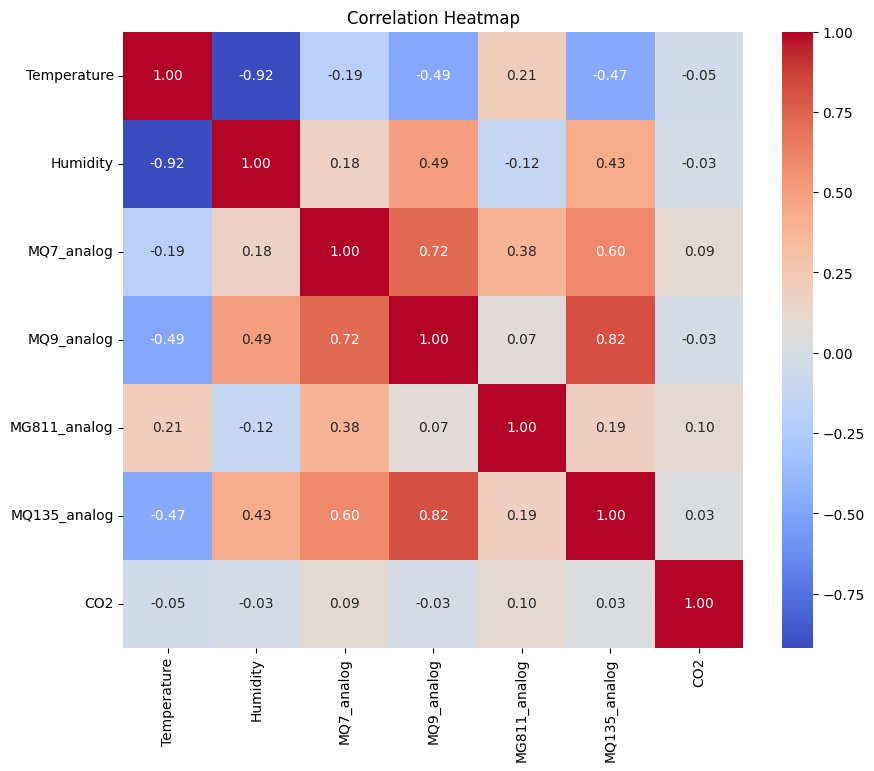


Validation RMSE: 5.02

Feature Importance:
        feature  importance
4  MG811_analog    0.223457
2    MQ7_analog    0.198930
1      Humidity    0.186360
3    MQ9_analog    0.145530
0   Temperature    0.127260
5  MQ135_analog    0.118462

Submission file saved as 'submission.csv'


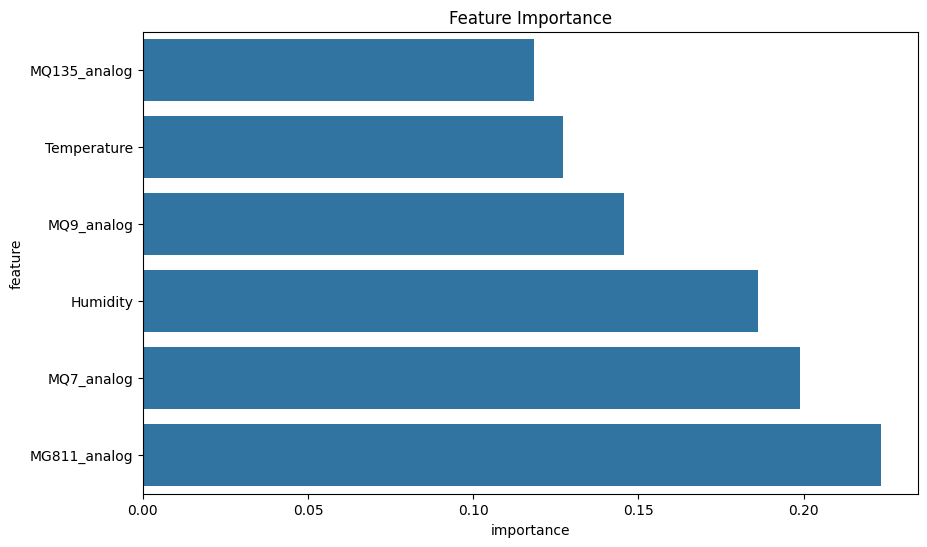

In [2]:
# 📦 Importing Libraries 🛠️
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 📂 Loading the Data 📥
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv("SampleSubmission.csv")

# Display data info
print("Train Data Info:")
print(train_data.info())
print("\nTrain Data Overview:")
print(train_data.head())

# Get numeric columns only
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
print("\nNumeric columns:", numeric_columns.tolist())

# 📈 Target Variable Distribution 🧐
plt.figure(figsize=(8, 5))
sns.histplot(train_data['CO2'], kde=True, bins=30)
plt.title('Distribution of CO2 in Train Data')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

# 🔗 Correlation Analysis 🔍 (using only numeric columns)
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# ✂️ Feature Selection & Preprocessing 🔄
features = ['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog']
target = 'CO2'

# 🎯 Splitting Features and Target 📋
X = train_data[features]
y = train_data[target]

# ✂️ Train-Test Split 🔀
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Model Training: Random Forest Regressor 🚀
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 🧪 Model Validation 📏
val_predictions = rf_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"\nValidation RMSE: {val_rmse:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

# 🔮 Generating Test Predictions 📤
test_features = test_data[features]
test_predictions = rf_model.predict(test_features)

# 📤 Preparing the Submission File 📝
sample_submission['CO2'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)
print("\nSubmission file saved as 'submission.csv'")

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.sort_values('importance', ascending=True), 
            y='feature', x='importance')
plt.title('Feature Importance')
plt.show()